In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ["OMP_NUM_THREADS"] = "1"
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.feature_selection import SelectKBest, f_classif

In [13]:
# Cargar los datos
data = pd.read_csv('C:\\Users\\david\\OneDrive\\Escritorio\\Mall_Customers.csv')

In [14]:
# Realizar un análisis exploratorio de los datos
print(data.head())
print(data.info())
print(data.describe())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  

In [15]:
# Manejar valores faltantes
data.dropna(inplace=True)

In [16]:
# Preprocesamiento de datos
X = data.iloc[:, 2:]  # Seleccionar las características relevantes (excluir ID de cliente y sexo)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
# Selección de características
selector = SelectKBest(score_func=f_classif, k=3)
X_selected = selector.fit_transform(X_scaled, data['Gender'])


In [17]:
# Entrenar y evaluar el modelo K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_selected)
kmeans_labels = kmeans.labels_

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [18]:
silhouette_kmeans = silhouette_score(X_selected, kmeans_labels)
calinski_kmeans = calinski_harabasz_score(X_selected, kmeans_labels)

In [19]:
# Entrenar y evaluar el modelo de Clustering Jerárquico
agglo = AgglomerativeClustering(n_clusters=3)
agglo.fit(X_selected)
agglo_labels = agglo.labels_


In [20]:
silhouette_agglo = silhouette_score(X_selected, agglo_labels)
calinski_agglo = calinski_harabasz_score(X_selected, agglo_labels)

In [21]:
# Visualización de los resultados
plt.figure(figsize=(12, 6))


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Text(0, 0.5, 'Feature 2')

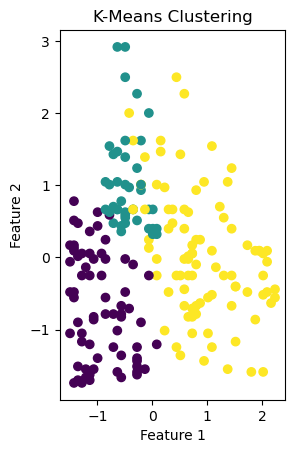

In [22]:
plt.subplot(1, 2, 1)
plt.scatter(X_selected[:, 0], X_selected[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

Text(0, 0.5, 'Feature 2')

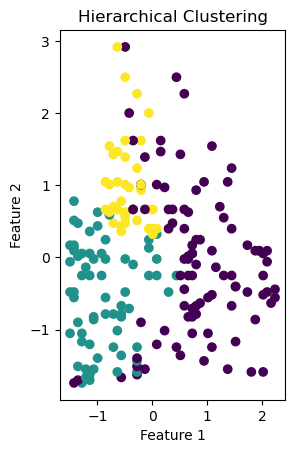

In [23]:
plt.subplot(1, 2, 2)
plt.scatter(X_selected[:, 0], X_selected[:, 1], c=agglo_labels, cmap='viridis')
plt.title('Hierarchical Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

In [24]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [25]:
# Imprimir métricas de evaluación
print("K-Means Silhouette Score:", silhouette_kmeans)
print("K-Means Calinski-Harabasz Score:", calinski_kmeans)
print("Hierarchical Clustering Silhouette Score:", silhouette_agglo)
print("Hierarchical Clustering Calinski-Harabasz Score:", calinski_agglo)

K-Means Silhouette Score: 0.357793388710272
K-Means Calinski-Harabasz Score: 101.6949470919303
Hierarchical Clustering Silhouette Score: 0.32148866683112387
Hierarchical Clustering Calinski-Harabasz Score: 88.10174149244529
